In [11]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import LoadDataset as LD
import numpy as np
import scipy.misc
from scipy.misc import imresize

In [118]:
def data_aug(img,evecs_mat):
    mu = 1
    sigma = 0.9
    feature_vec = np.matrix(evecs_mat)

    # 3 x 1 scaled eigenvalue matrix
    se = np.zeros((3,1))
    se[0][0] = np.random.normal(mu, sigma)*evals[0]
    se[1][0] = np.random.normal(mu, sigma)*evals[1]
    se[2][0] = np.random.normal(mu, sigma)*evals[2]
    se = np.matrix(se)
    val = feature_vec*se
    
    # Parse through every pixel value.
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Parse through every dimension.
            for k in range(img.shape[2]):
                img[i,j,k] = float(img[i,j,k]) + float(val[k])
                
                
    return img


In [119]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 5

In [140]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoing
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(np.shape(x_train[0])[0])

32


In [121]:
res = np.zeros(shape=(1,3))

for i in range(len(x_train[0:1000])):
    m=transform.resize(x_train[i],(8,8,3))
    # Reshape the matrix to a list of rgb values.
    arr=m.reshape((8*8),3)
    # concatenate the vectors for every image with the existing list.
    res = np.concatenate((res,arr),axis=0)

# delete initial zeros' row
res = np.delete(res, (0), axis=0)
# print list of vectors - 3 columns (rgb)
print (res)


[[0.08137255 0.04117647 0.00784314]
 [0.49705882 0.34901961 0.19313725]
 [0.4372549  0.3        0.16764706]
 ...
 [0.4127451  0.39313725 0.34705882]
 [0.43039216 0.42843137 0.40588235]
 [0.43431373 0.45980392 0.45098039]]


In [122]:
m = res.mean(axis = 0)
res = res - m

In [123]:
R = np.cov(res, rowvar=False)

In [124]:
print (R)

[[0.05573124 0.04947351 0.04642913]
 [0.04947351 0.05448102 0.05356111]
 [0.04642913 0.05356111 0.06414459]]


[[ 0.74290848  0.0060925   0.01588181]
 [ 0.22428633 -0.17528379  0.01039603]
 [ 0.30092124 -0.14826525  0.01552143]
 ...
 [ 0.15272776 -0.00929975  0.001696  ]
 [ 0.08720975  0.0175333   0.00385909]
 [ 0.03980249  0.0449572  -0.00196586]]
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[-0.552484   -0.72455048  0.41205344]
 [-0.57606111 -0.0253789  -0.81701255]
 [-0.60242429  0.68875433  0.40336392]]


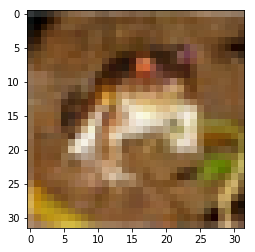

In [125]:
from numpy import linalg as LA
evals, evecs = LA.eigh(R)

idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
# sort eigenvectors according to same index

evals = evals[idx]
# select the first 3 eigenvectors (3 is desired dimension
# of rescaled data array)

evecs = evecs[:, :3]
# carry out the transformation on the data using eigenvectors
# and return the re-scaled data, eigenvalues, and eigenvectors
m = np.dot(evecs.T, res.T).T
print (m)
# perturbing color in image[0]
# re-scaling from 0-1
img1 = x_train[0]
print (img1)
print(evecs)
img = data_aug(img,m)

plt.imshow(img)


[[[ 53  57  58]
  [ 37  41  40]
  [ 44  43  38]
  ...
  [152 127 103]
  [146 120  97]
  [142 119  98]]

 [[ 10  15  15]
  [  0   0   0]
  [ 12   3   0]
  ...
  [117  83  50]
  [113  78  45]
  [116  82  52]]

 [[ 19  19  16]
  [ 10   2   0]
  [ 43  22   3]
  ...
  [112  79  45]
  [114  79  45]
  [103  68  37]]

 ...

 [[202 165  91]
  [195 148  29]
  [192 156  21]
  ...
  [154 128  65]
  [ 50  26   2]
  [ 47  29  15]]

 [[174 134  91]
  [167 118  37]
  [180 139  25]
  ...
  [178 143  89]
  [ 91  57  29]
  [ 77  48  29]]

 [[171 139 111]
  [162 124  89]
  [173 137  82]
  ...
  [210 179 135]
  [145 113  79]
  [117  87  67]]]


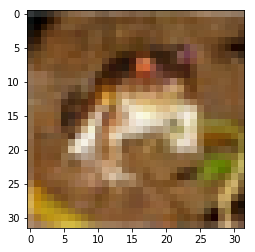

In [126]:
plt.imshow(img)
print(img)

In [131]:
def pca(img, alpha_std=0.1):
    orig_img = img.astype(float).copy()
    img = img / 255.0  # rescale to 0 to 1 range
    # flatten image to columns of RGB
    img_rs = img.reshape(-1, 3)
    # img_rs shape (640000, 3)
    img_centered = img_rs - np.mean(img_rs, axis=0)
    # paper says 3x3 covariance matrix
    img_cov = np.cov(img_centered, rowvar=False)
    # eigen values and eigen vectors
    eig_vals, eig_vecs = np.linalg.eigh(img_cov)
    # sort values and vector
    sort_perm = eig_vals[::-1].argsort()
    eig_vals[::-1].sort()
    eig_vecs = eig_vecs[:, sort_perm]

    # get [p1, p2, p3]
    m1 = np.column_stack((eig_vecs))

    # get 3x1 matrix of eigen values multiplied by random variable draw from normal
    # distribution with mean of 0 and standard deviation of 0.1
    m2 = np.zeros((3, 1))
    # according to the paper alpha should only be draw once per augmentation (not once per channel)
    alpha = np.random.normal(0, alpha_std)

    # broad cast to speed things up
    m2[:, 0] = alpha * eig_vals[:]

    # this is the vector that we're going to add to each pixel in a moment
    add_vect = np.matrix(m1) * np.matrix(m2)

    for idx in range(3):   # RGB
        orig_img[..., idx] += add_vect[idx]
    orig_img = np.clip(orig_img, 0.0, 255.0)
    orig_img = orig_img.astype(np.uint8)
    return orig_img

In [132]:
print(x_train)
print(pca(x_train))

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69